In [2]:
%matplotlib inline

import matplotlib
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create an Excel file object
excel = pandas.ExcelFile( 'PET_PRI_SPT_S1_M.xls' )
    
# parse the first sheet
df = excel.parse( excel.sheet_names[1] )
 
# rename the columns
df = df.rename( columns=dict( zip( df.columns, ['Date','WTI','Brent'] ) ) )

# cut off the first 18 rows because these rows
# contain NaN values for the Brent prices
df = df[18:]
 
# index the data set by date
df.index = df['Date']
 
# remove the date column after re-indexing
df = df[['WTI','Brent']]

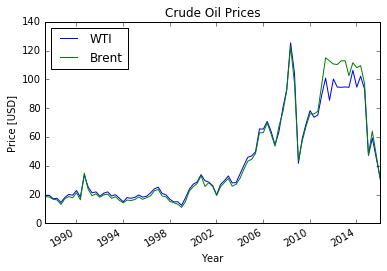

In [4]:
ax = df[['WTI','Brent']][::4].plot(title='Crude Oil Prices')

ax.set_xlabel('Year')
ax.set_ylabel('Price [USD]')

In [5]:
df[-36*4:].to_csv('prices_last_three_years.csv')

The code below is in R
=============

In [1]:
data <- read.csv('prices_last_three_years.csv')

In [2]:
# load Hyndman's forecast package
library(forecast)
 
# create a model with a trend
WTI.hwm <- HoltWinters( data$WTI, gamma=FALSE )
 
# predict the values for the next 4 weeks #
WTI.hwf <- forecast.HoltWinters( WTI.hwm, h=4 )
 
# print a summary of the forecast
summary( WTI.hwf )

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 6.2 




Forecast method: HoltWinters

Model Information:
Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = data$WTI, gamma = FALSE)

Smoothing parameters:
 alpha: 1
 beta : 0.4932021
 gamma: FALSE

Coefficients:
       [,1]
a 31.680000
b -4.567289

Error measures:
                      ME     RMSE      MAE       MPE     MAPE     MASE
Training set -0.09448587 6.444642 5.018645 0.5252298 7.104701 1.045165
                   ACF1
Training set 0.07216629

Forecasts:
    Point Forecast      Lo 80    Hi 80       Lo 95    Hi 95
145       27.11271  18.825225 35.40020  14.4380945 39.78733
146       22.54542   7.651787 37.43906  -0.2324274 45.32327
147       17.97813  -4.221587 40.17785 -15.9734094 51.92968
148       13.41084 -16.840070 43.66176 -32.8539375 59.67563


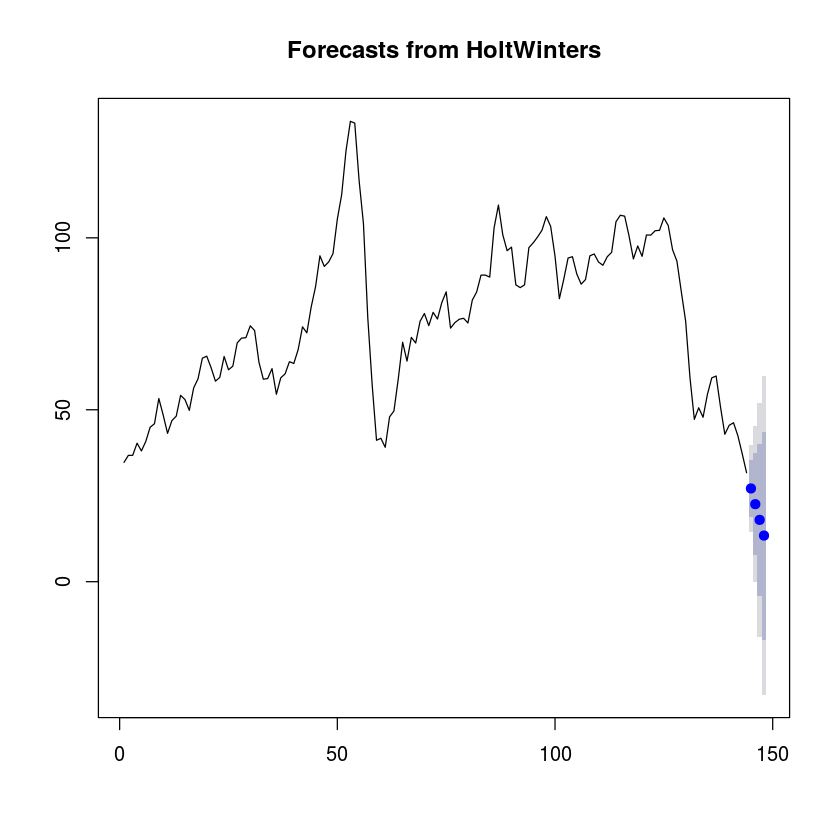

In [3]:
plot.forecast( WTI.hwf )

Forecast with ARIMA(1,0,0)
=========================

In [4]:
WTI.arima <- arima( data$WTI, order=c(1,0,0) )
WTI.arimaf <- forecast.Arima( WTI.arima, h=4 )
summary( WTI.arimaf )


Forecast method: ARIMA(1,0,0) with non-zero mean

Model Information:

Call:
arima(x = data$WTI, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.9711    62.1191
s.e.  0.0198    16.5639

sigma^2 estimated as 41.29:  log likelihood = -473.64,  aic = 953.27

Error measures:
                   ME     RMSE      MAE        MPE    MAPE     MASE      ACF1
Training set 0.325088 6.425349 4.858142 -0.3458114 7.00648 1.010038 0.4152794

Forecasts:
    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
145       32.55924 24.32483 40.79366 19.96579 45.15269
146       33.41309 21.93482 44.89136 15.85859 50.96758
147       34.24227 20.38389 48.10066 13.04770 55.43684
148       35.04750 19.27013 50.82488 10.91809 59.17691


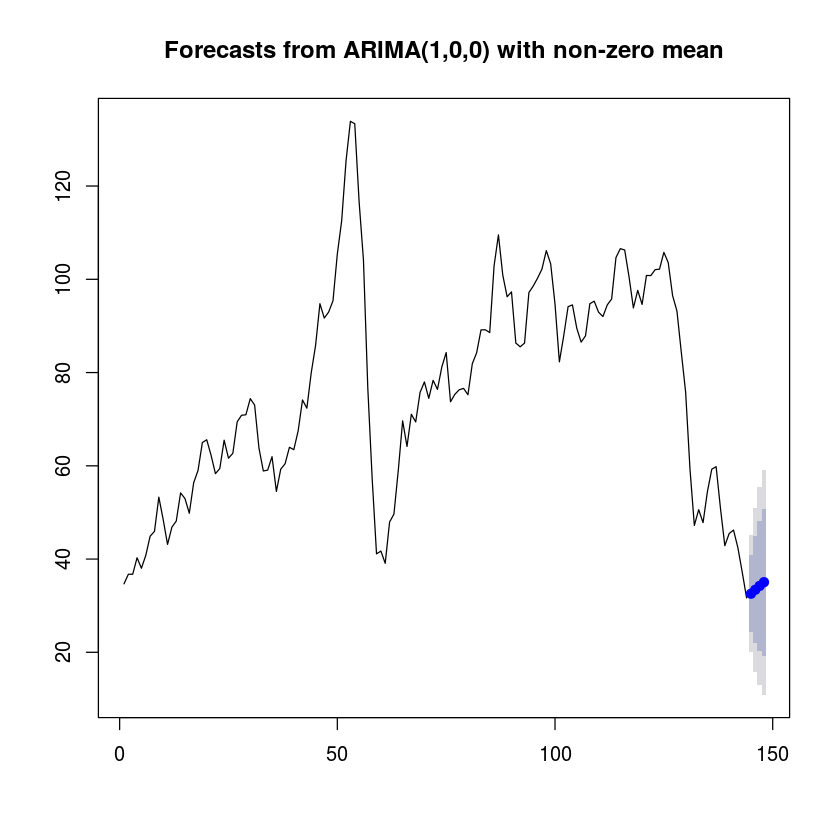

In [5]:
plot.forecast( WTI.arimaf )

Forecast with ARIMA(2,0,0)
=========================

In [6]:
WTI.arima <- arima( data$WTI, order=c(2,0,0) )
WTI.arimaf <- forecast.Arima( WTI.arima, h=4 )
summary( WTI.arimaf )


Forecast method: ARIMA(2,0,0) with non-zero mean

Model Information:

Call:
arima(x = data$WTI, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1.3929  -0.4419    69.7048
s.e.  0.0746   0.0759     9.5300

sigma^2 estimated as 33.37:  log likelihood = -458.45,  aic = 924.89

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.2129498 5.776534 4.660087 -0.3943638 6.857314 0.9688613
                   ACF1
Training set -0.0599971

Forecasts:
    Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
145       31.10834 23.70541 38.51127 19.786541 42.43014
146       32.74672 20.05320 45.44024 13.333663 52.15978
147       35.28135 18.42494 52.13776  9.501691 61.06101
148       38.08781 18.01839 58.15723  7.394281 68.78135


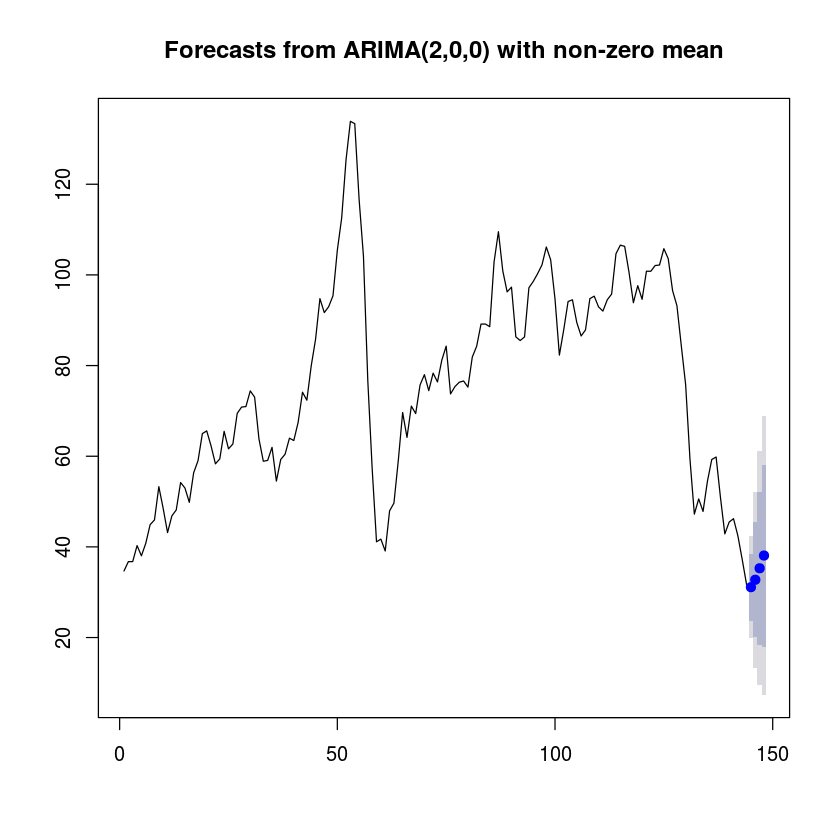

In [7]:
plot.forecast( WTI.arimaf )